In [3]:
import praw
import pandas as pd
from datetime import datetime

In [4]:

# Reddit API credentials
client_id = "WhEE7bp0lHQux8TKfOKCiA"
client_secret = "XP4zGgFNgNell0FGPmK8DG4W-ZANOw"

# Authenticate to Reddit API
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent="script:urban_transportation:v1.0 (by /u/Great_Photograph_740)"
)

# Define target subreddits
subreddits = [
    "urbanplanning",
    "transportation",
    "publictransit",
    "roadcam",
    "cars",
    "infrastructureporn"
]

# Define traffic-related keywords
keywords = ["traffic", "accident", "roadblock", "delayed", "highway", "jam", "congestion", "incident"]

# Initialize list to store collected posts
posts_data = []

# Collect data from Reddit
for subreddit_name in subreddits:
    try:
        subreddit = reddit.subreddit(subreddit_name)
        for keyword in keywords:
            print(f"Searching in r/{subreddit_name} for '{keyword}'...")
            for post in subreddit.search(keyword, limit=50):
                posts_data.append({
                    "subreddit": subreddit_name,
                    "keyword": keyword,
                    "title": post.title,
                    "text": post.selftext,
                    "score": post.score,
                    "num_comments": post.num_comments,
                    "created_at": datetime.fromtimestamp(post.created_utc),
                    "url": post.url
                })
    except praw.exceptions.RedditAPIException as e:
        print(f"Error collecting data from r/{subreddit_name}: {e}")
    except Exception as e:
        print(f"Error accessing r/{subreddit_name}: {e}")

# Convert to DataFrame
reddit_df = pd.DataFrame(posts_data)

# Save to CSV
reddit_df.to_csv("reddit_traffic_data.csv", index=False)

print("Data collection complete! Saved to 'reddit_traffic_data.csv'.")


Searching in r/urbanplanning for 'traffic'...
Searching in r/urbanplanning for 'accident'...
Searching in r/urbanplanning for 'roadblock'...
Searching in r/urbanplanning for 'delayed'...
Searching in r/urbanplanning for 'highway'...
Searching in r/urbanplanning for 'jam'...
Searching in r/urbanplanning for 'congestion'...
Searching in r/urbanplanning for 'incident'...
Searching in r/transportation for 'traffic'...
Searching in r/transportation for 'accident'...
Searching in r/transportation for 'roadblock'...
Searching in r/transportation for 'delayed'...
Searching in r/transportation for 'highway'...
Searching in r/transportation for 'jam'...
Searching in r/transportation for 'congestion'...
Searching in r/transportation for 'incident'...
Searching in r/publictransit for 'traffic'...
Error accessing r/publictransit: received 403 HTTP response
Searching in r/roadcam for 'traffic'...
Searching in r/roadcam for 'accident'...
Searching in r/roadcam for 'roadblock'...
Searching in r/roadca

In [5]:
import pandas as pd
import re

In [6]:
# Load your CSV file
reddit_data = pd.read_csv('reddit_traffic_data.csv')

# Convert 'created_at' to datetime
reddit_data['created_at'] = pd.to_datetime(reddit_data['created_at'])

# Fill missing text with an empty string
reddit_data['text'] = reddit_data['text'].fillna('')

# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = ' '.join(text.split())  # Remove extra whitespace
    return text.lower()

# Apply cleaning to both 'title' and 'text' columns
reddit_data['clean_title'] = reddit_data['title'].apply(clean_text)
reddit_data['clean_text'] = reddit_data['text'].apply(clean_text)

# Save the cleaned data
reddit_data.to_csv('reddit_traffic_data_cleaned.csv', index=False)

print("Data cleaning complete! Saved to 'reddit_traffic_data_cleaned.csv'.")

Data cleaning complete! Saved to 'reddit_traffic_data_cleaned.csv'.


<h2>Sentiment Analysis

In [7]:
from textblob import TextBlob

import pandas as pd

# Load the cleaned data file
cleaned_reddit_data = pd.read_csv('reddit_traffic_data_cleaned.csv')


# Perform sentiment analysis
def get_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return 0
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to cleaned text
cleaned_reddit_data['sentiment_title'] = cleaned_reddit_data['clean_title'].apply(get_sentiment)
cleaned_reddit_data['sentiment_text'] = cleaned_reddit_data['clean_text'].apply(get_sentiment)

# Categorize sentiment into Positive, Negative, or Neutral
def categorize_sentiment(sentiment_score):
    if sentiment_score > 0.1:
        return 'Positive'
    elif sentiment_score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

cleaned_reddit_data['sentiment_category'] = cleaned_reddit_data['sentiment_text'].apply(categorize_sentiment)

# Save the data with sentiment analysis
cleaned_reddit_data.to_csv('reddit_sentiment_analysis.csv', index=False)
print("Sentiment analysis complete! Saved to 'reddit_sentiment_analysis.csv'.")


Sentiment analysis complete! Saved to 'reddit_sentiment_analysis.csv'.


<h2> Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\DELL\AppData\Local\Temp\ipykernel_1596\2527262123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=cleaned_reddit_data, palette='viridis')


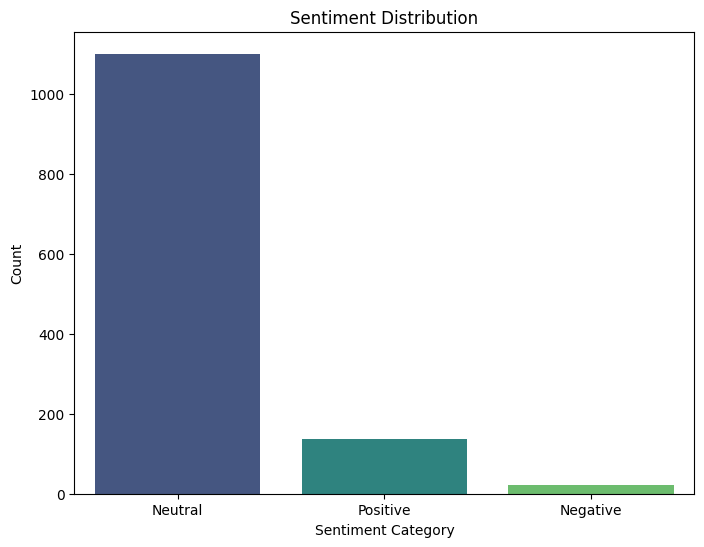

<Figure size 1000x600 with 0 Axes>

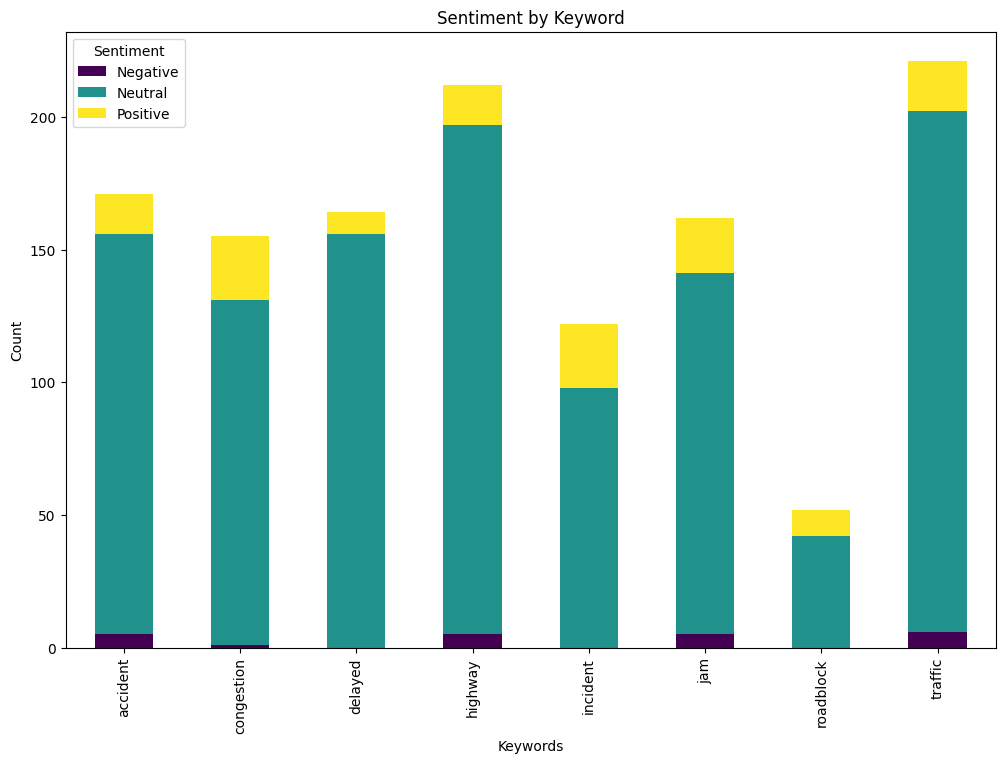

In [9]:

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=cleaned_reddit_data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

# Plot top keywords by sentiment
plt.figure(figsize=(10, 6))
top_keywords = cleaned_reddit_data.groupby('keyword')['sentiment_category'].value_counts().unstack().fillna(0)
top_keywords.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Sentiment by Keyword')
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [10]:
import pandas as pd
import plotly.express as px
import streamlit as st

In [11]:
# Load the sentiment analysis dataset
data = pd.read_csv('reddit_sentiment_analysis.csv')

# Streamlit app title
st.title("Urban Transportation Sentiment Analysis")
st.write("Interactive web app to analyze public sentiment on urban transportation.")

# Sidebar for filters
st.sidebar.header("Filter Options")
subreddits = st.sidebar.multiselect("Select Subreddits", options=data['subreddit'].unique(), default=data['subreddit'].unique())
keywords = st.sidebar.multiselect("Select Keywords", options=data['keyword'].unique(), default=data['keyword'].unique())

# Filter data based on sidebar selections
filtered_data = data[(data['subreddit'].isin(subreddits)) & (data['keyword'].isin(keywords))]

# Display filtered data
st.header("Filtered Data")
st.write(f"Showing {len(filtered_data)} posts")
st.dataframe(filtered_data)

# Sentiment Distribution Chart
st.header("Sentiment Distribution")
sentiment_count = filtered_data['sentiment_category'].value_counts()
fig_sentiment = px.pie(
    sentiment_count,
    values=sentiment_count.values,
    names=sentiment_count.index,
    title="Sentiment Distribution",
    color=sentiment_count.index,
    color_discrete_map={'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'}
)
st.plotly_chart(fig_sentiment)

# Sentiment by Keywords
st.header("Sentiment by Keywords")
keyword_sentiment = filtered_data.groupby('keyword')['sentiment_category'].value_counts().unstack().fillna(0)
keyword_sentiment = keyword_sentiment.reset_index().melt(id_vars='keyword', var_name='Sentiment', value_name='Count')
fig_keywords = px.bar(
    keyword_sentiment,
    x='keyword',
    y='Count',
    color='Sentiment',
    title='Sentiment by Keyword',
    barmode='stack',
    color_discrete_map={'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'}
)
st.plotly_chart(fig_keywords)

# Engagement Over Time
st.header("Engagement Over Time")
filtered_data['date'] = pd.to_datetime(filtered_data['created_at']).dt.date
engagement = filtered_data.groupby('date')['score'].sum().reset_index()
fig_engagement = px.line(
    engagement,
    x='date',
    y='score',
    title="Engagement Over Time",
    labels={'score': 'Engagement Score', 'date': 'Date'}
)
st.plotly_chart(fig_engagement)


2025-01-05 23:14:04.008 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 23:14:07.318 
  command:

    streamlit run C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-05 23:14:07.333 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 23:14:07.333 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 23:14:07.341 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 23:14:07.352 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 23:14:07.355 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 23:14:07.358 Threa

DeltaGenerator()

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

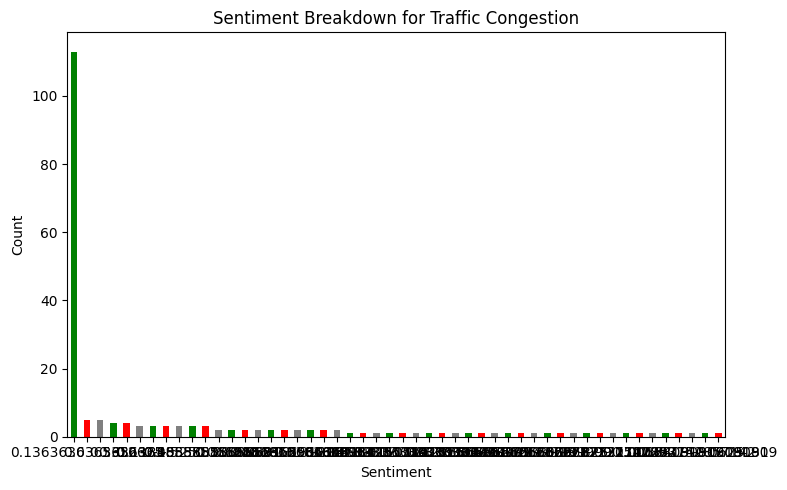

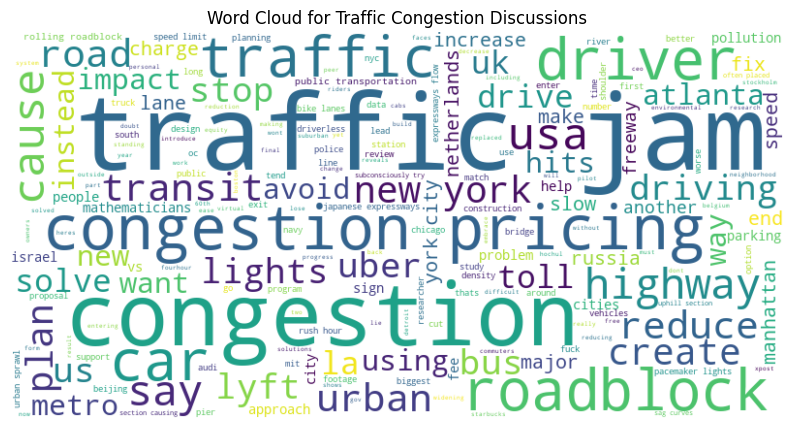

In [15]:


# Load the sentiment analysis dataset
file_path = 'reddit_sentiment_analysis.csv'
data = pd.read_csv(file_path)

# Filter data related to "traffic congestion"
traffic_keywords = ['traffic congestion', 'traffic jam', 'roadblock', 'congestion']
traffic_data = data[data['clean_title'].str.contains('|'.join(traffic_keywords), case=False, na=False)]

# Sentiment Breakdown
sentiment_counts = traffic_data['sentiment_title'].value_counts()

# Plot sentiment breakdown
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Breakdown for Traffic Congestion')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('traffic_sentiment_breakdown.png')
plt.show()

# Word Cloud of Common Keywords
text = ' '.join(traffic_data['clean_title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Traffic Congestion Discussions')
plt.savefig('traffic_wordcloud.png')
plt.show()

# Time-Series Analysis (if timestamp exists)
if 'timestamp' in traffic_data.columns:
    traffic_data['timestamp'] = pd.to_datetime(traffic_data['timestamp'])
    traffic_data['date'] = traffic_data['timestamp'].dt.date
    
    daily_mentions = traffic_data.groupby('date').size()

    plt.figure(figsize=(10, 5))
    daily_mentions.plot(kind='line', color='blue')
    plt.title('Daily Mentions of Traffic Congestion')
    plt.xlabel('Date')
    plt.ylabel('Number of Mentions')
    plt.tight_layout()
    plt.savefig('traffic_daily_mentions.png')
    plt.show()

# Save filtered traffic data for further analysis
traffic_data.to_csv('traffic_congestion_filtered.csv', index=False)
